In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def voting_1():
    """
    Prints pie graph of 50/50 split
    :returns: pie split
    """
    pd.Series(('A','B')).pie()

# Pie Charts
Use pie charts to visualize *relative* data

In [5]:
%matplotlib  inline
fifty=pd.Series((1,1))


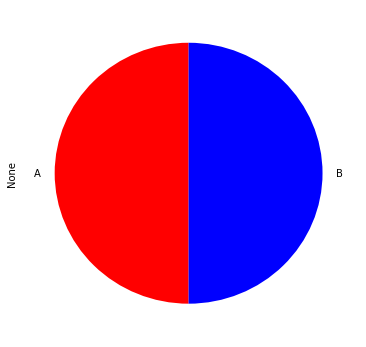

In [6]:
def voting_1():
    #fifty.plot(kind='pie', figsize=(6,6))
    pd.Series(index=('A','B'), data=(0.5, 0.5)).plot(kind='pie', colors=('red', 'blue'), figsize=(6,6), legend=False, startangle=90)
    
voting_1()

In [3]:
voting_1_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646868/e-48648859/m-48729157'

In [7]:
def voting_2():
    """
    prints pie chart, good for relative data
    :returns : 
    """
    votes = pd.DataFrame(index=('A','B'), data={'Votes':(724, 181)})
    return 100*votes.Votes/votes.Votes.sum()

In [10]:
def voting_2_with_series():
    """
    Calculates the percentage of each value in a series relative to sum of a series
    """
    votes = pd.Series({'A': 724, 'B': 181})
    #Multiplying by 100 only to convert to proportion of "100" for "percent"
    return 100* votes/votes.sum()
voting_2_with_series()

A    80.0
B    20.0
dtype: float64

In [16]:
assert (voting_2().values==pd.Series((80,20))).all(), '80 percent votes for A, only 20 percent voted for B'
assert (np.allclose(voting_2().values, pd.Series((80,20)))), '80 percent votes for A, only 20 percent voted for B'
assert (np.allclose(voting_2_with_series(), pd.Series((80, 20)))), '80 A, 20 B'
voting_2_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646868/e-48747153/m-48697516'

In [17]:
pd.Series((80, 20))

0    80
1    20
dtype: int64

In [18]:
def voting_3():
    voting_2().plot(kind='pie', colors=('red', 'blue'), legend=False, figsize=(6,6), startangle=90)

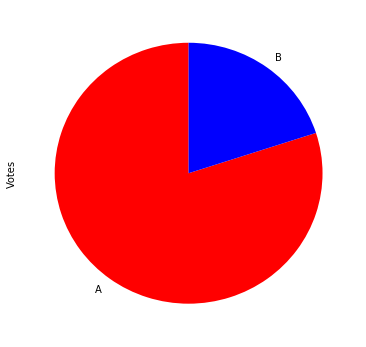

In [19]:
voting_3()
voting_3_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646868/e-48728369/m-48723323'

In [23]:
def relative_data(new_size_b=23000):
    """
    Prints pie chart same as voting_3, just invariant to the total number of votes;
    relative sizes
    :params new_size_b: new size B
    :returns: the size of A  voters based on voting_2() percentages (80%)
    """
    #total size should be 23,000 / 0.2 = 115,000
    total_size = new_size_b/(voting_2()['B']/100)
    
    #new_size is 80% of the total size; 92000
    #print(total_size) 
    new_size_a = total_size * (voting_2()['A']/100)
    new_size =  pd.Series({'A': new_size_a, 'B': new_size_b})#index=('A','B'), data=( new_size_a, new_size_b))
    new_size.plot(kind='pie', colors=('red', 'blue'), legend=False, figsize=(6,6), startangle=90)
    return new_size['A']

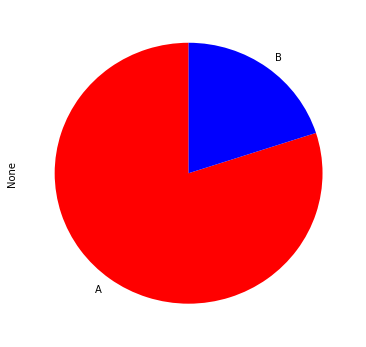

In [25]:
assert relative_data() == 92000, 'The 23K is 20% , so the total is 115K , so the 80% should be  92K, not {}'.format(relative_data())
relative_data_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646868/e-48726369/m-48721272'

In [27]:
def relative_data_sebastians_way(new_size_b=23000):
    #The values stay relative to *the whole* i.e. some percentage of 100
    # But the values also stay relative to *one another* , as Sebastian explains
    """https://classroom.udacity.com/courses/st101/lessons/48646868/concepts/487263690923
    You can see this, because 80's exactly 4 times as much as 20. So 
    if you took 23,000, divide by 20%, multiply by 80%, that's the  same as multiplying by 4
    And thats the same as the pie, which shows 4x as many graphically."""
    relative_proportion = voting_2().A/voting_2().B
    return new_size_b * relative_proportion
    


In [28]:
assert relative_data_sebastians_way() == 92000, 'The 23K is 20% , so the total is 115K , so the 80% should be  92K, not {}'.format(relative_data())


In [29]:
def pick_the_breaks(series=None, colors=list(reversed(('blue','red','black')))):
    """
    Suppose you're taking a Udacity class
    Following age distribution
    """
    students = series if series is not None else pd.Series(index=('13-19','20-32','33-999'), data=(12000, 96000, 36000)).iloc[::-1]
    students.plot(kind='pie', colors=colors, startangle=90, figsize=(6,6))
    return pd.Series([_/(1/12) for _ in reversed((students  )/ students.sum())]).cumsum()

13-19      1.0
20-32      9.0
33-999    12.0
dtype: float64

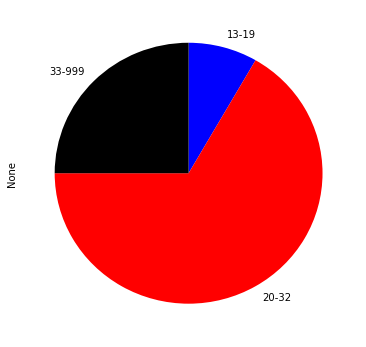

In [66]:
def pick_the_breaks_less_code(series=None, colors=('blue','red','black')):
    """
    Suppose you're taking a Udacity class
    Following age distribution
    """
    #iloc goes through them backwards; puts 33-999 first
    students = series if series is not None else pd.Series({'13-19':12000,'20-32':96000,'33-999':36000})
    students.plot(kind='pie', colors=colors, startangle=90, figsize=(6,6), counterclock=False)
    cumulative_sum = (12* (students/students.sum())).cumsum()
    #cumulative sum is just an interesting way of expressing "which of the 12 marks in Sebastians
    #clock, represents the boundary between successive groups
    
    #This is calculated for you, when you plot() the data in kind= 'pie'
    #And you calculate it yourself when you divide by sum()
    return cumulative_sum
pick_the_breaks_less_code()

In [67]:
print(pd.Series({'13-19':12000,'20-32':96000,'33-999':36000}).iloc[::-1])
print(pd.Series({'13-19':12000,'20-32':96000,'33-999':36000}))

33-999    36000
20-32     96000
13-19     12000
dtype: int64
13-19     12000
20-32     96000
33-999    36000
dtype: int64


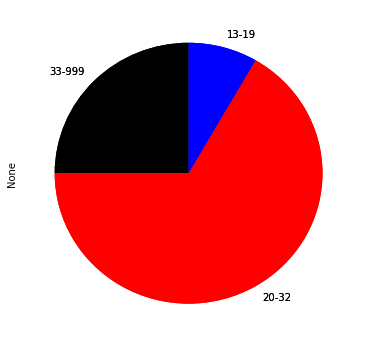

In [68]:
assert pick_the_breaks()[0]==1., 'Percentages should be at 1/12, 8/12 (9/12 cumulatively), and 3/12 (12/12 cumulatively) respectively'
assert np.allclose(pick_the_breaks(),(1., 9., 12.)), 'Percentages should be at 1/12, 8/12 (9/12 cumulatively), and 3/12 (12/12 cumulatively) respectively'

In [69]:
pick_the_breaks_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646868/e-48726370/m-48678723'

In [70]:
def pick_the_breaks_2():
    return pick_the_breaks()[1]

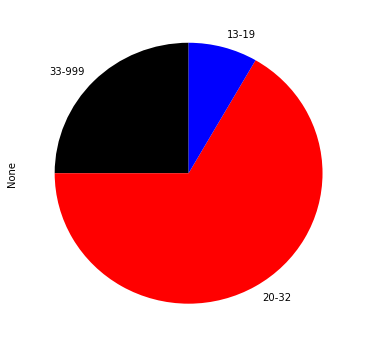

In [71]:
assert pick_the_breaks_2() == 9, 'Second one is 9'
pick_the_breaks_2_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646868/e-48532783/m-48742003'

In [72]:
def build_a_chart():
    return pick_the_breaks(pd.Series(index=list('ABCD'), data=(175, 50, 25, 50)).iloc[::-1], colors=list(reversed(('black', 
                                                                                                        'blue', 'red', 'green'))))

In [73]:
def build_a_chart_slim():
    return pick_the_breaks_less_code(pd.Series({'A':175,'B':50,'C':25,'D':50}), colors=('black', 'blue', 'red', 'green'))

A     7.0
B     9.0
C    10.0
D    12.0
dtype: float64

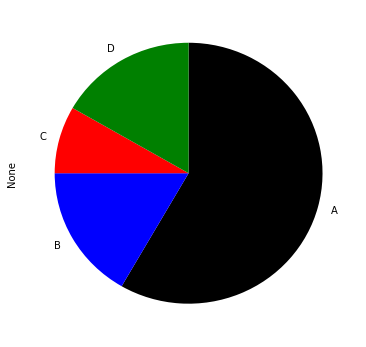

In [74]:
build_a_chart_slim()

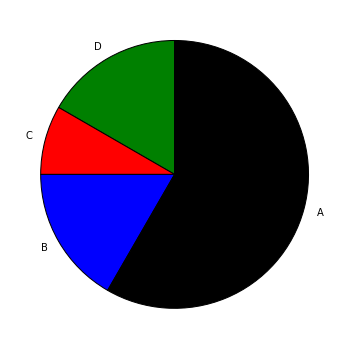

In [152]:
assert np.allclose(build_a_chart(), pd.Series(data=(7,9,10,12))), 'Respective twelfths are 7, 9, 10, for A, B, C. '
build_a_chart_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646868/e-48747154/m-48739045'

In [75]:
def inferring_counts(series=None, new_total = 240000, colors=list(reversed(('black', 
                                                                                                        'blue', 'red', 'green')))):
    """
    Applying the same percentages to a series of a different total
    """
    students = series if series is not None else pd.Series(index=list('ABCD'), data=(175, 50, 25, 50)).iloc[::-1]
    students = (students/students.sum())*new_total
    students.plot(kind='pie', colors=colors, startangle=90, figsize=(6,6))
    return students

A    140000.0
B     40000.0
C     20000.0
D     40000.0
dtype: float64

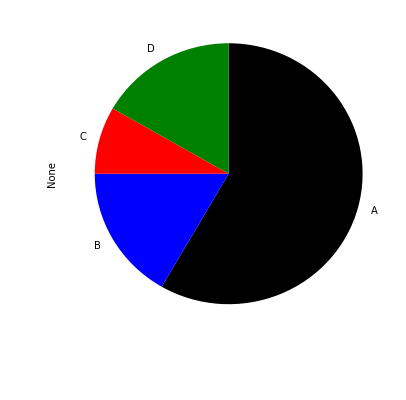

In [98]:
def inferring_counts_slim(series=None, new_total = 240000, colors=('black',  'blue', 'red', 'green')):
    """
    Applying the same percentages to a series of a different total
    """
    students = series if series is not None else pd.Series(dict(A=175,B=50,C=25,D=50))
    students = (students/students.sum())*new_total
    students.plot(kind='pie', colors=colors, startangle=90, figsize=(6,6), counterclock=False, radius=1)
    
    index=0
    for party,vote_count in students.iteritems():
        #print('annotating ', index, vote_count/students.sum())
        plt.annotate(vote_count, xy = (np.pi, 1), xytext = (0, 0), textcoords = 'offset points')
        index+=1
    plt.annotate('a polar annotation',
            xy=(np.pi,0.5),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
    return students
inferring_counts_slim()

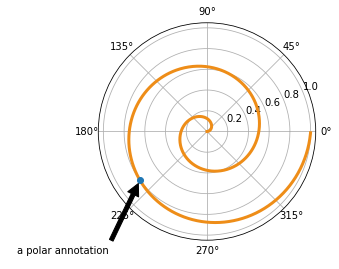

In [93]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
r = np.arange(0,1,0.001)
#Nate observed if you change the second 2, to 3; then the spiral forms 3 full revolutions; to 4 then 4 revolutions.
#the first 2 must represent that np.pi is half the theta of "1"
theta = 2*2*np.pi*r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
plt.show()

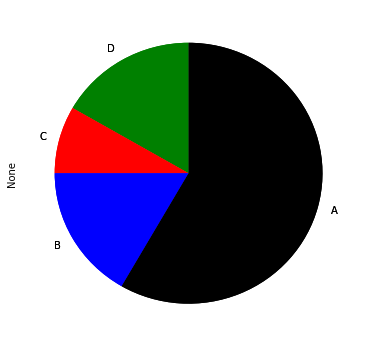

In [99]:

assert np.all(inferring_counts()==pd.Series(index=list('ABCD'), data=(140000, 40000, 20000, 40000))[::-1]), 'Values should be A 140K,  B 40K,  C 20K, D 40K'

assert np.allclose(inferring_counts(),pd.Series(dict(A=140000, B=40000, C=20000, D=40000))[::-1]), 'Values should be A 140K,  B 40K,  C 20K, D 40K'

In [165]:
inferring_counts_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646868/e-48717441/m-48742005'